In [1]:
import os
import torch
from torchvision import datasets, transforms

import numpy as np
from sklearn.manifold import TSNE

from vae import VAE
import matplotlib.pyplot as plt

if not os.path.exists('figs'):
    os.mkdir('figs')

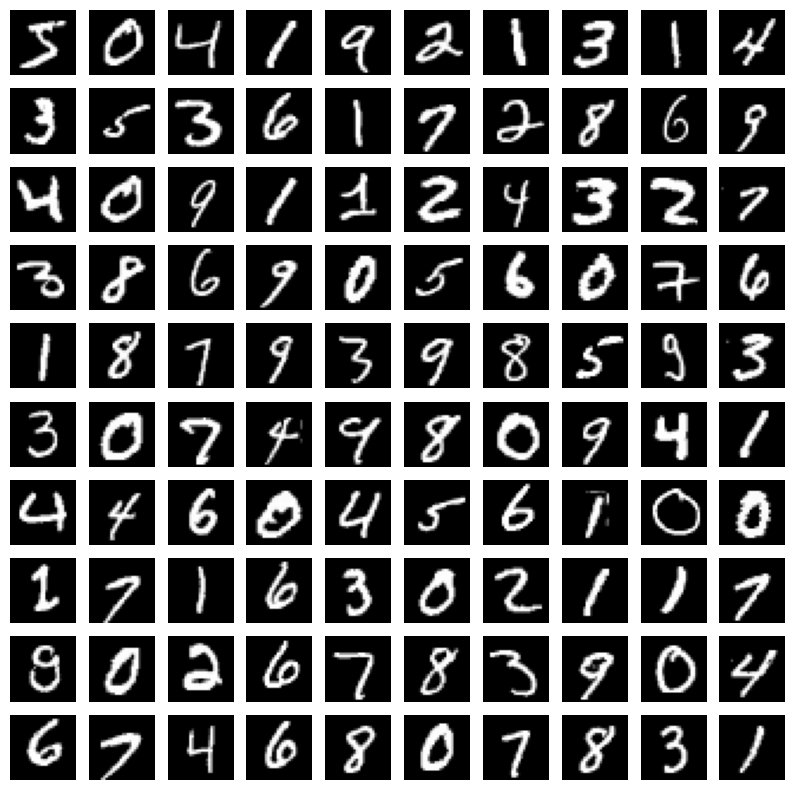

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 画像だけを抽出
images = [data[0] for data in mnist_train]

# ラベルだけを抽出
lbl = [data[1] for data in mnist_train]

plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.show()

In [4]:
model = VAE(x_dim=784, h_dim=200, z_dim=20)
model.learn(images[:500], epoch=300)

c:\Users\miyoshi\Documents\Git\VAE\src\vae\__init__.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(x, dtype=dtype, device=self.device)
c:\Users\miyoshi\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


epoch:1, loss:206.43021472167968
epoch:2, loss:152.85127536010742
epoch:3, loss:139.01443226623536
epoch:4, loss:131.36380416870117
epoch:5, loss:126.3817576751709
epoch:6, loss:122.5964497680664
epoch:7, loss:119.07924016571044
epoch:8, loss:116.24996390533447
epoch:9, loss:113.9921198348999
epoch:10, loss:111.24837618255616
epoch:11, loss:109.47417092895508
epoch:12, loss:106.70059159088134
epoch:13, loss:105.7983763961792
epoch:14, loss:103.2952767868042
epoch:15, loss:101.9794132385254
epoch:16, loss:100.7971683807373
epoch:17, loss:99.40321556091308
epoch:18, loss:99.02665167999268
epoch:19, loss:97.35008344268799
epoch:20, loss:96.76210499572754
epoch:21, loss:95.3935278930664
epoch:22, loss:94.55093482971192
epoch:23, loss:93.79073801422119
epoch:24, loss:93.15546515655518
epoch:25, loss:92.11082216644287
epoch:26, loss:92.07727624511719
epoch:27, loss:91.45811340332031
epoch:28, loss:90.9136237411499
epoch:29, loss:90.90187310028077
epoch:30, loss:89.9203477935791
epoch:31, los

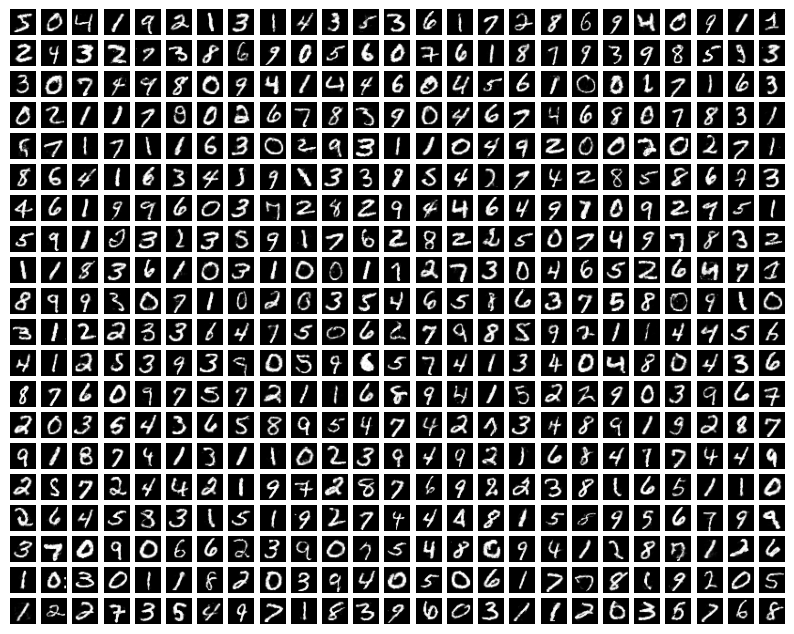

In [17]:
plt.figure(figsize=(10, 10))
point = []
for i in range(500):
    z_hat, x_hat = model.generate(images[i])
    plt.subplot(25, 25, i + 1)
    point.append(z_hat.detach().cpu().numpy()[0])
    x_hat = x_hat.view(-1, 28, 28)
    plt.imshow(x_hat.squeeze(), cmap='gray')
    plt.axis('off')

plt.savefig('./figs/gen_img_500.png')
plt.show()

In [14]:
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(np.array(point))

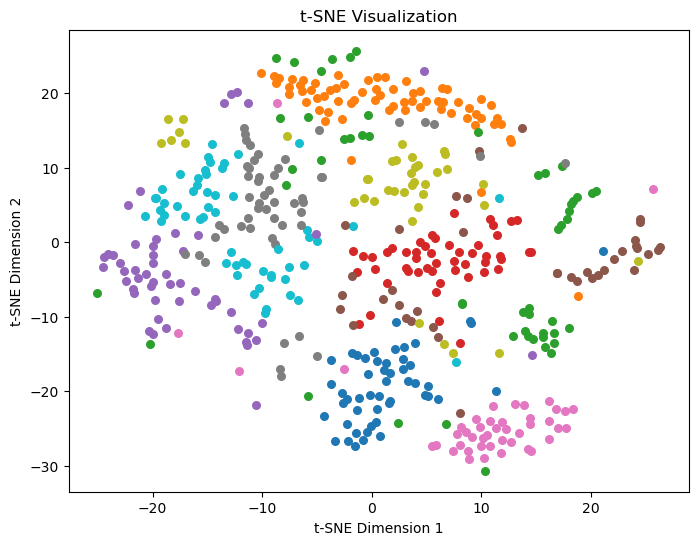

In [15]:
colors = [
    (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),   # 青
    (1.0, 0.4980392156862745, 0.054901960784313725),                 # オレンジ
    (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),  # 緑
    (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),   # 赤
    (0.5803921568627451, 0.403921568627451, 0.7411764705882353),     # 紫
    (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),  # 茶
    (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),    # ピンク
    (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),    # グレー
    (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),   # イエロー
    (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)     # シアン
]

plt.figure(figsize=(8, 6))
for i, (x,y) in enumerate(X_embedded):
    ci = colors[int(lbl[i])]
    plt.scatter(x, y, color=ci, marker='o', s=30)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.savefig('./figs/tSEN_z_500')
plt.show()

In [7]:
point = []
for i in range(5000):
    z_hat, x_hat = model.generate(images[i])
    point.append(z_hat.detach().numpy()[0])

c:\Users\miyoshi\Documents\ML\VAE\VAE\vae\__init__.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(x, dtype=dtype, device=self.device)


In [8]:
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(np.array(point))

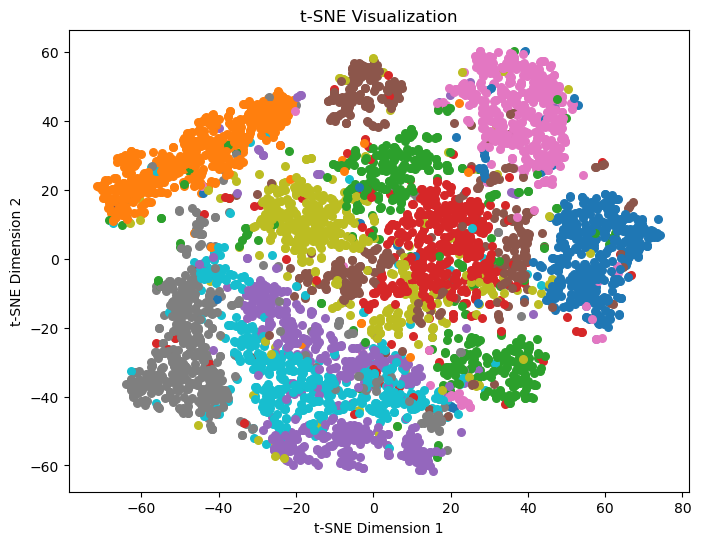

In [12]:
# プロット
plt.figure(figsize=(8, 6))
for i, (x,y) in enumerate(X_embedded):
    ci = colors[int(lbl[i])]
    plt.scatter(x, y, color=ci, marker='o', s=30)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.savefig('./figs/tSEN_z_5000.png')
plt.show()

c:\Users\miyoshi\Documents\ML\VAE\VAE\vae\__init__.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(x, dtype=dtype, device=self.device)


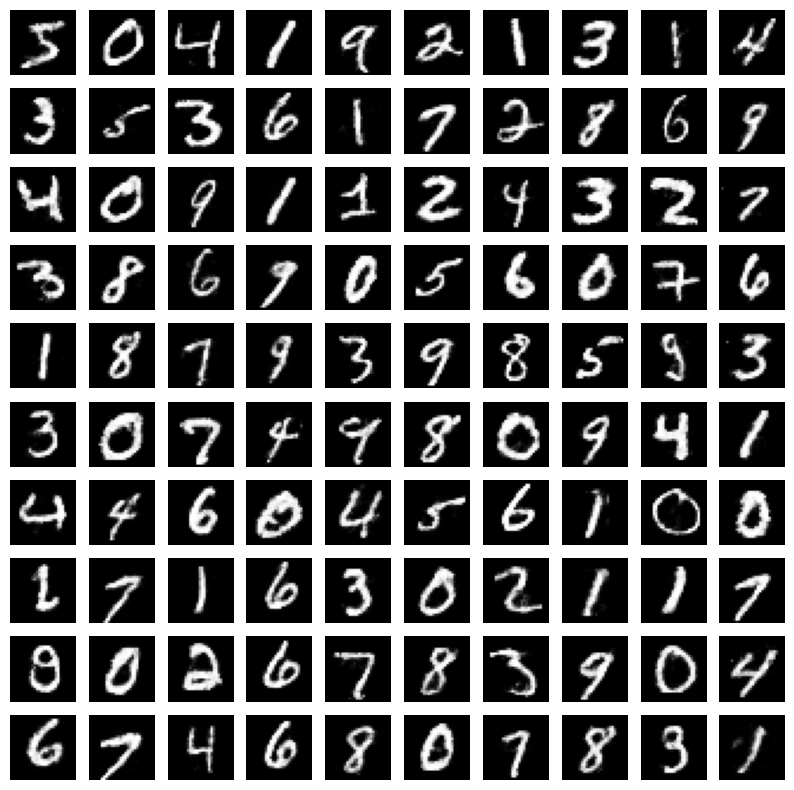

In [11]:
plt.figure(figsize=(10, 10))
for i in range(100):
    z_hat, x_hat = model.generate(images[i])
    plt.subplot(10, 10, i + 1)
    x_hat = x_hat.view(-1, 28, 28)
    plt.imshow(x_hat.squeeze(), cmap='gray')
    plt.axis('off')
plt.savefig('./figs/gen_img_100.png')
plt.show()